In [1]:
import time
from pathlib import Path
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
path_data = Path().resolve().parent / "testdata" / "CarPrice.csv"
df = pd.read_csv(path_data)
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


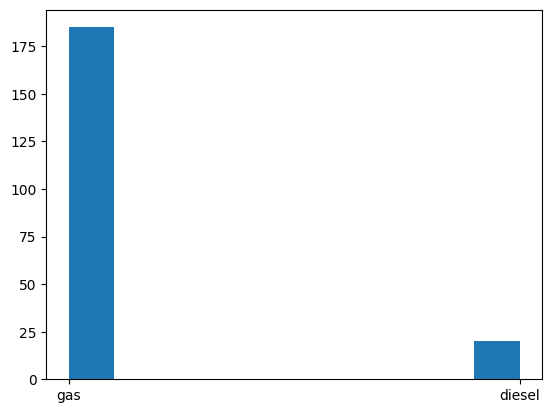

In [3]:
df.drop(["car_ID","symboling","CarName","aspiration","doornumber","fuelsystem","enginelocation","enginetype"],axis=1,inplace=True)
plt.hist(df["fueltype"])
plt.show()

In [4]:
dummy1 = pd.get_dummies(df['fueltype'],drop_first=True)
dummy2 = pd.get_dummies(df['carbody'],drop_first=True)
dummy3 = pd.get_dummies(df['drivewheel'],drop_first=True)
dummy4 = pd.get_dummies(df['cylindernumber'],drop_first=True)
df.drop(['fueltype','carbody',"drivewheel","cylindernumber"],axis=1,inplace=True)

In [5]:
df = pd.concat([df,dummy1,dummy2,dummy3,dummy4],axis=1)
df.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,...,sedan,wagon,fwd,rwd,five,four,six,three,twelve,two
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,...,False,False,False,True,False,True,False,False,False,False
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,...,False,False,False,True,False,False,True,False,False,False
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,...,True,False,True,False,False,True,False,False,False,False
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,...,True,False,False,False,True,False,False,False,False,False


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["price"],axis=1), 
                                                    df['price'], test_size=0.30, 
                                                    random_state=111)

In [7]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(X_train, y_train)

RandomForestRegressor()

In [8]:
print(model.score(X_train,y_train))

0.9872480025911952


In [9]:
print(model.score(X_test,y_test))

0.9315290200217771
